<a href="https://colab.research.google.com/github/Goravvv-error/Sentimental-Analysis/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


               Date Created  Number of Likes  \
0  2025-04-16T09:04:24.000Z                0   
1  2025-04-16T08:59:19.000Z                1   
2  2025-04-16T08:51:03.000Z                0   
3  2025-04-16T08:32:47.000Z                0   
4  2025-04-16T08:26:20.000Z                0   
5  2025-04-16T08:02:48.000Z                4   
6  2025-04-16T08:00:23.000Z               30   
7  2025-04-16T07:33:38.000Z                0   
8  2025-04-16T07:31:28.000Z                0   
9  2025-04-16T07:29:49.000Z                1   

                                               Tweet  Sentiment Score  \
0  Dear @socialepfo @epfokrpuram \nKindly settle ...          -0.7717   
1  ಬೇಸಿಗೆ ಸಲುವಾಗಿ ಸರ್ಕಾರಿ ಕೆಲಸದ ಅವಧಿಯನ್ನು ಬೆಳಿಗ್ಗ...           0.0000   
2  ಜಾತಿಜನಗಣತಿ GAME IS ON.. Hey suppressed communi...           0.4871   
3  I am Waiting eagerly to kick out this idiot's ...           0.3818   
4  Guru @siddaramaiah Your Real ambedkar Follower...           0.0258   
5  #CasteCensus\nA cabinet meet t

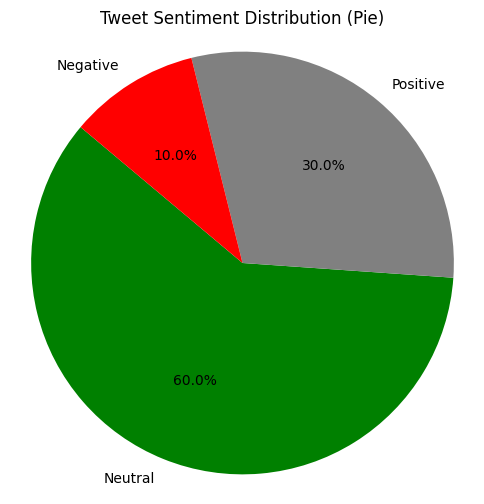

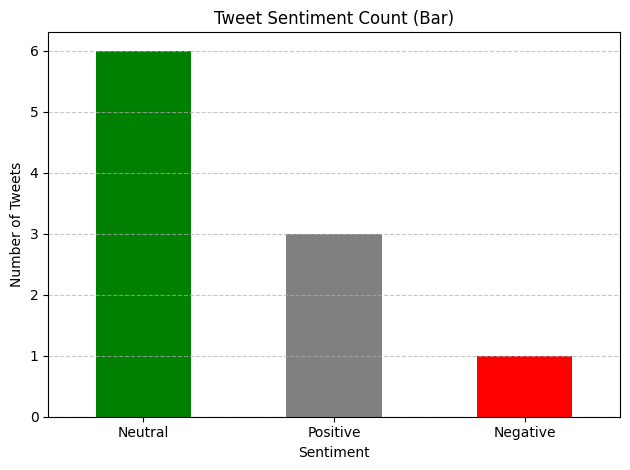

Sentiment analysis saved to 'siddaramaiah_tweets_sentiment.csv'


In [1]:
import requests
import pandas as pd
import time
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# 🧠 Download VADER model
nltk.download('vader_lexicon')

# 🔑 Twitter Bearer Token (replace with yours)
bearer_token = "AAAAAAAAAAAAAAAAAAAAAD2b0gEAAAAA3ews13wA0odNjl5xtN1RzYJ%2FIOo%3DwbfJZWWXwoB0TKZHktdpExQv77NLGIc14U846YwJgnDeJUV1aP"

# 🛠 Setup headers
headers = {
    "Authorization": f"Bearer {bearer_token}"
}

# 🟦 Twitter API endpoint
search_url = "https://api.twitter.com/2/tweets/search/recent"

# 🔍 Search query setup
query_params = {
    'query': "Siddaramaiah -is:retweet -is:reply -has:links",
    'tweet.fields': 'created_at,public_metrics,text',
    'max_results': 10
}

# 📡 Send request
response = requests.get(search_url, headers=headers, params=query_params)

# Handle rate limiting
if response.status_code != 200:
    if response.status_code == 429:
        print("Rate limit hit. Waiting 15 minutes...")
        time.sleep(900)
        response = requests.get(search_url, headers=headers, params=query_params)
    else:
        raise Exception(f"Request failed: {response.status_code} - {response.text}")

# 🧠 Process and analyze data
try:
    tweets = response.json().get('data', [])
    attributes_container = [
        [tweet["created_at"], tweet["public_metrics"]["like_count"], tweet["text"]]
        for tweet in tweets
    ]

    columns = ["Date Created", "Number of Likes", "Tweet"]
    tweets_df = pd.DataFrame(attributes_container, columns=columns)

    # 💬 Sentiment Analysis using VADER
    sia = SentimentIntensityAnalyzer()
    tweets_df["Sentiment Score"] = tweets_df["Tweet"].apply(lambda x: sia.polarity_scores(x)["compound"])

    def classify(score):
        if score >= 0.05:
            return "Positive"
        elif score <= -0.05:
            return "Negative"
        else:
            return "Neutral"

    tweets_df["Sentiment"] = tweets_df["Sentiment Score"].apply(classify)

    # 🖨️ Print DataFrame
    print(tweets_df)

    # 📊 Plot Pie Chart
    sentiment_counts = tweets_df["Sentiment"].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'])
    plt.title("Tweet Sentiment Distribution (Pie)")
    plt.axis('equal')
    plt.show()

    # 📊 Plot Bar Chart
    sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
    plt.title("Tweet Sentiment Count (Bar)")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Tweets")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Missing data: {e}")
    print(response.json())
tweets_df.to_csv("siddaramaiah_tweets_sentiment.csv", index=False)
print("Sentiment analysis saved to 'siddaramaiah_tweets_sentiment.csv'")
